# Homework Assignment \#3

### Problem 1.

In [3]:
import numpy as np
from scipy.stats import bernoulli, binom, poisson, norm, expon
import seaborn as sns

In [4]:
D = [[1], [0], [0], [0], [0], [1], [0], [1], [0], [0],
     [1], [1], [0], [0], [0], [0], [1], [0], [0], [0]]
mean_d = np.mean(D)
var_d = np.var(D)
print(mean_d)
print(var_d)

0.3
0.20999999999999996


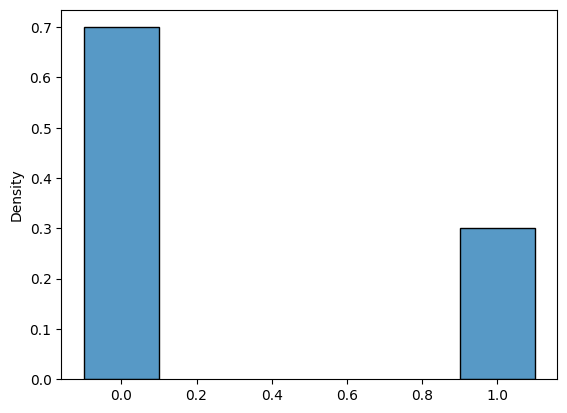

In [31]:
X = bernoulli(mean_d)
X_samples = X.rvs(100000)
sns.histplot(X_samples, stat="density", discrete=True, shrink=0.2);

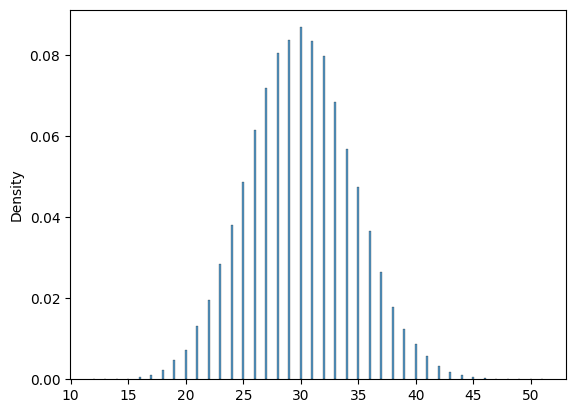

In [6]:
N = 100  # an additional assumption on the binomial trial
X = binom(N, mean_d)
X_samples = X.rvs(100000)
sns.histplot(X_samples, stat="density", discrete=True, shrink=0.2);

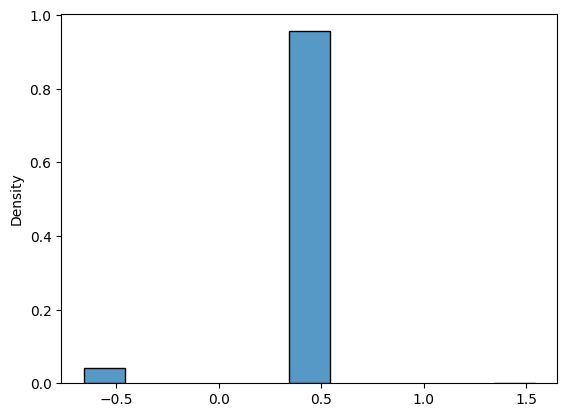

In [7]:
X = norm(mean_d, var_d)
X_samples = X.rvs(100000)
sns.histplot(X_samples, stat="density", discrete=True, shrink=0.2);

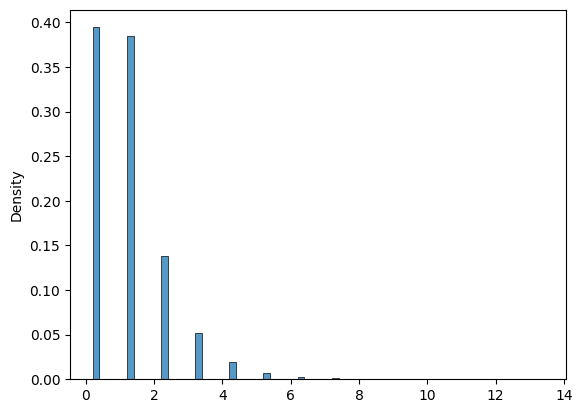

In [8]:
X = expon(mean_d)
X_samples = X.rvs(100000)
sns.histplot(X_samples, stat="density", discrete=True, shrink=0.2);

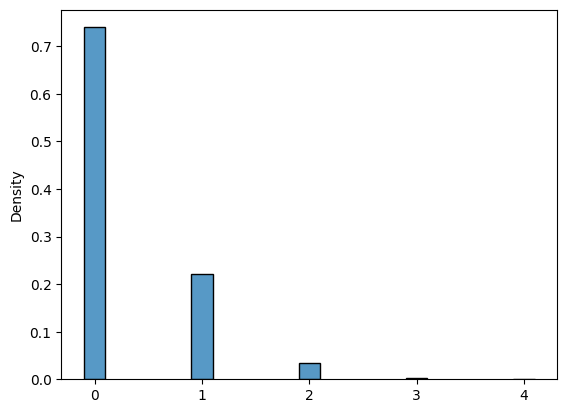

In [9]:
X = poisson(mean_d)
X_samples = X.rvs(100000)
sns.histplot(X_samples, stat="density", discrete=True, shrink=0.2);

### Problem 5.

In [11]:
# source: https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

def kde1D(x, bandwidth, kernel='tophat', bins=1000, hisbins=15, color='darkorange', **kwargs):
    
    lw = 2 # line width
    
    xx = np.linspace(np.min(x)-np.std(x),np.max(x)+np.std(x), bins)[:, np.newaxis]
   # true_dens = (0.09 * norm(0, 1).pdf(xx[:, 0]) + 0.7 * norm(5, 1).pdf(xx[:, 0]))
   # true_dens = (norm(np.mean(x), np.std(x)).pdf(xx[:, 0]))
    
    fig, ax = plt.subplots()
    #ax.fill(xx[:, 0], true_dens, fc='black', alpha=0.2, label='input distribution')
    hist = plt.hist(x, bins=hisbins, density=True, alpha=0.2, histtype='stepfilled', color='black', label='input distribution')
    
    
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth)
    kde.fit(x)
    
    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde.score_samples(xx))
    ax.plot(xx[:, 0], z, color=color, lw=lw, linestyle='-', label="kernel = '{0}'".format(kernel))
    
    ax.legend(loc='upper left')
    ax.text(0.06, 16, "N={0} points".format(N))

    return xx, z

Text(0.5, 1.0, 'Distribution (Bandwidth=0.015)')

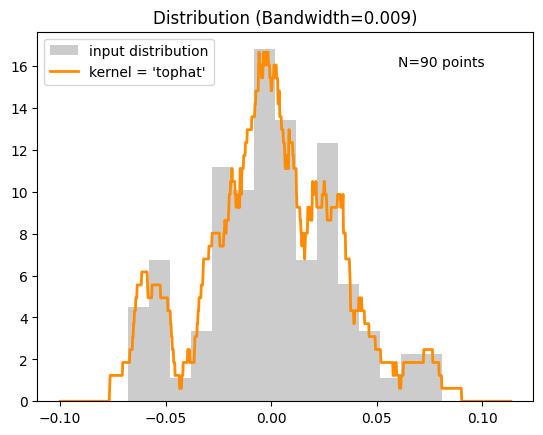

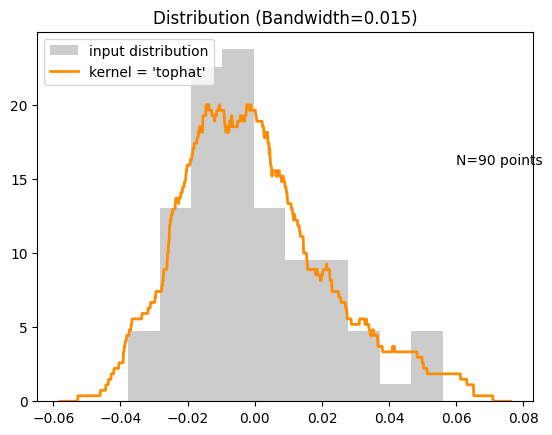

In [12]:
# (a)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('./hw3_data.csv')

N = 90
amygdaladata = data.loc[:, 'amygdala']
accdata = data.loc[:, 'acc']
orientationdata = data.loc[:, 'orientation']

amygdala = data['amygdala'].values[:, np.newaxis]
acc = accdata.values[:, np.newaxis]
orientation = orientationdata.values[:, np.newaxis]

bandwidth_a = 0.009

#best_bandwidth = (4 / 3 * amygdala.std() ** 5 / amygdala.size) ** 0.2 #scott rule
Pamy, amyden = kde1D(amygdala, bandwidth_a)
plt.title(f'Distribution (Bandwidth={bandwidth_a})')

# (b)
bandwidth_b = 0.015
Pacc, accden = kde1D(acc, bandwidth_b, hisbins=10)
plt.title(f'Distribution (Bandwidth={bandwidth_b})')
#best_bandwidth2 = (4 / 3 * acc.std() ** 5 / acc.size) ** 0.2

In [13]:
# from sklearn.neighbors import KernelDensity

def kde2D(x, y, bandwidth, kernel='tophat', xbins=100j, ybins=100j, cmap='RdPu', **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min():x.max():xbins, y.min():y.max():ybins]
    
    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth, **kwargs)
    kde.fit(xy_train)
    
    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde.score_samples(xy_sample))
    zz = np.reshape(z, xx.shape)
    zznorm = zz/np.sum(zz)

    plt.pcolormesh(xx, yy, zznorm, cmap=cmap, shading='auto')
    plt.scatter(x, y, s=1, facecolor='blue')
    cset = plt.contour(xx, yy, zznorm, colors='k', linewidths=0.5)
    plt.clabel(cset, inline=1, fontsize=10)

    
    return xx, yy, zz, zznorm

Text(0.5, 1.0, 'Joint Distribution (Bandwidth=0.03)')

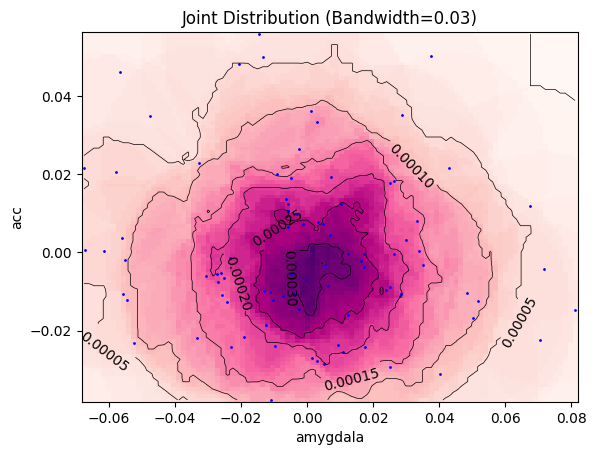

In [14]:
# (c)
bandwidth_c = 0.03

x = amygdaladata+accdata
y = amygdaladata-accdata

xx, yy, zz, zznorm = kde2D(amygdaladata, accdata, bandwidth_c, kernel='tophat', xbins=100j, ybins=100j)
plt.xlabel('amygdala')
plt.ylabel('acc')
plt.title(f'Joint Distribution (Bandwidth={bandwidth_c})')

In [15]:
#(d)
from sklearn.metrics import mean_squared_error
N = 90
Px, z = kde1D(amygdala, bandwidth_a, bins=100)
plt.close()
Py, z2 = kde1D(acc, bandwidth_b, bins=100)
plt.close()

z = z.reshape(100,1)
z2 = z2.reshape(1,100)

z /= np.sum(z)
z2 /= np.sum(z2)

#P(x) * P(Y)
PxPy = np.matmul(z,z2)
#P(X,Y)
Pxy = zznorm
print(f'P(X)*P(Y) = {PxPy}')
print(f'P(X,Y) = {Pxy}')

# Independent or dependent
mse = mean_squared_error(PxPy, Pxy)
print(f'MSE = {mse}')

P(X)*P(Y) = [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
P(X,Y) = [[1.90431454e-05 1.90431454e-05 1.90431454e-05 ... 1.26954303e-05
  1.26954303e-05 1.26954303e-05]
 [1.90431454e-05 1.90431454e-05 1.90431454e-05 ... 1.26954303e-05
  1.26954303e-05 1.26954303e-05]
 [1.90431454e-05 1.90431454e-05 1.90431454e-05 ... 1.26954303e-05
  1.26954303e-05 1.26954303e-05]
 ...
 [1.26954303e-05 1.26954303e-05 1.26954303e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.26954303e-05 1.26954303e-05 1.26954303e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.26954303e-05 1.26954303e-05 1.26954303e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
MSE = 1.176290232297465e-08


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [      -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf 6.61636189 6.45143999 6.29448446 6.8379082
 6.69477962 6.9175741  6.78603325 6.80345097 6.92696919 7.37827607
 7.26506572 7.43031962 7.42584964 7.32335152 7.49864046 7.40222433
 7.30858632 7.21757079 7.12903485 7.04284696 6.9588858  6.8770392
 6.89856953 6.82064781 6.74455068 6.67019464 6.59750179 6.67334603
 6.6037659  6.64721605 6.58049301 6.80084932 6.73675799 6.67390616
 6.61224679 6.55173549 6.49233028 6.43399144 6.37668137 6.46026836
 6.40491068 6.55714979 6.50361585 6.54527301 6.49344648 6.44243346
 6.39220879 6.34274848 6.29402962 6.2460303  6.38815101 6.34152884
 6.36354947 6.39719087 6.35249237 6.3084003  6.26489842 6.22197113
 6.17960347 6.13778101 6.09

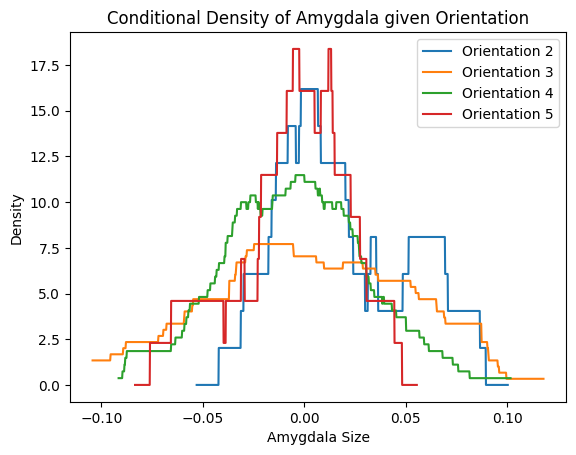

The most likely Orientation for Amygdala = 0.035 is 2
when Orientation is 2, best bandwidth = 0.019010241020971434
when Orientation is 3, best bandwidth = 0.0621835174134203
when Orientation is 4, best bandwidth = 0.03293901205009598
when Orientation is 5, best bandwidth = 0.018135570671754697


In [16]:
# (e)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('./hw3_data.csv')

orientationdata = data.loc[:, 'orientation']
amygdaladata = data.loc[:, 'amygdala']
amygdala_ori_2 = data[(data['amygdala']!=0)&(data['orientation']==2)]
amy_ori_2 = amygdala_ori_2.loc[:, 'amygdala']
amy_ori_2_1D = amy_ori_2.values[:, np.newaxis]
amygdala_ori_3 = data[(data['amygdala']!=0)&(data['orientation']==3)]
amy_ori_3 = amygdala_ori_3.loc[:, 'amygdala']
amy_ori_3_1D = amy_ori_3.values[:, np.newaxis]
amygdala_ori_4 = data[(data['amygdala']!=0)&(data['orientation']==4)]
amy_ori_4 = amygdala_ori_4.loc[:, 'amygdala']
amy_ori_4_1D = amy_ori_4.values[:, np.newaxis]
amygdala_ori_5 = data[(data['amygdala']!=0)&(data['orientation']==5)]
amy_ori_5 = amygdala_ori_5.loc[:, 'amygdala']
amy_ori_5_1D = amy_ori_5.values[:, np.newaxis]

ori_context = np.unique(orientationdata)

amy_ori_data = {}
amy_ori_data[2] = amy_ori_2_1D
amy_ori_data[3] = amy_ori_3_1D
amy_ori_data[4] = amy_ori_4_1D
amy_ori_data[5] = amy_ori_5_1D

fig, ax = plt.subplots()
 
best_bandwidths = {}

log_likelihoods = []
def kde_conditional(data, ori_num, target_amygdala, kernel='tophat'):

    xx = np.linspace(np.min(data)-np.std(data),np.max(data)+np.std(data), 1000)[:, np.newaxis]
    
    kde = KernelDensity(kernel='tophat')
    kde.fit(data)

    grid = GridSearchCV(kde, {'bandwidth': np.linspace(0.1*np.std(data), np.std(data)*2, 100)}, cv=4)
    grid.fit(data)
    kde = grid.best_estimator_

    best_bandwidth = grid.best_params_['bandwidth']
    best_bandwidths[ori_num] = best_bandwidth

    log_dens = kde.score_samples(xx.reshape(-1, 1))
    density = np.exp(log_dens)

    label = f'Orientation {ori_num}'
    ax.plot(xx, density, label=label)

    log_likelihood = kde.score_samples(np.array([[target_amygdala]]))
    log_likelihoods.append(np.exp(log_likelihood))

    return kde
    
target_amygdala = 0.035
kde_amy_ori = {}
for i in ori_context:
    kde_amy_ori[i] = kde_conditional(amy_ori_data[i], i, target_amygdala, kernel='tophat')

ax.set_xlabel('Amygdala Size')
ax.set_ylabel('Density')
ax.legend()
plt.title('Conditional Density of Amygdala given Orientation')
plt.show()

most_likely_orientation = np.argmax(log_likelihoods) + 2
print(f"The most likely Orientation for Amygdala = {target_amygdala} is {most_likely_orientation}")

print(f"when Orientation is 2, best bandwidth = {best_bandwidths[2]}")
print(f"when Orientation is 3, best bandwidth = {best_bandwidths[3]}")
print(f"when Orientation is 4, best bandwidth = {best_bandwidths[4]}")
print(f"when Orientation is 5, best bandwidth = {best_bandwidths[5]}")



c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [      -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf 6.64446317 6.60606372 6.61600153 6.57870379
 6.54193355 6.55593897 6.52018017 6.48490651 6.450105   6.41576318
 6.38186904 6.34841108 6.

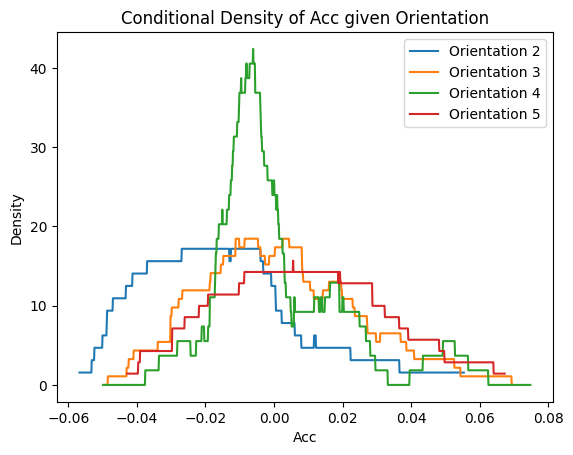

The most likely Orientation for Acc = -0.02 is 2
when Orientation is 2, best bandwidth = 0.024631661400815647
when Orientation is 3, best bandwidth = 0.019199965449773537
when Orientation is 4, best bandwidth = 0.006616172466972609
when Orientation is 5, best bandwidth = 0.029232082820036046


In [17]:
#(f)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('./hw3_data.csv')

orientationdata = data.loc[:, 'orientation']
accdata = data.loc[:, 'acc']
accdata_ori_2 = data[(data['acc']!=0)&(data['orientation']==2)]
acc_ori_2 = accdata_ori_2.loc[:, 'acc']
acc_ori_2_1D = acc_ori_2.values[:, np.newaxis]
accdata_ori_3 = data[(data['acc']!=0)&(data['orientation']==3)]
acc_ori_3 = accdata_ori_3.loc[:, 'acc']
acc_ori_3_1D = acc_ori_3.values[:, np.newaxis]
accdata_ori_4 = data[(data['acc']!=0)&(data['orientation']==4)]
acc_ori_4 = accdata_ori_4.loc[:, 'acc']
acc_ori_4_1D = acc_ori_4.values[:, np.newaxis]
accdata_ori_5 = data[(data['acc']!=0)&(data['orientation']==5)]
acc_ori_5 = accdata_ori_5.loc[:, 'acc']
acc_ori_5_1D = acc_ori_5.values[:, np.newaxis]

ori_context = np.unique(orientationdata)

acc_ori_data = {}
acc_ori_data[2] = acc_ori_2_1D
acc_ori_data[3] = acc_ori_3_1D
acc_ori_data[4] = acc_ori_4_1D
acc_ori_data[5] = acc_ori_5_1D

fig, ax = plt.subplots()

best_bandwidths = {}
log_likelihoods = []
def kde_conditional(data, ori_num, target_acc, kernel='tophat'):

    xx = np.linspace(np.min(data)-np.std(data),np.max(data)+np.std(data), 1000)[:, np.newaxis]
    
    kde = KernelDensity(kernel='tophat')
    kde.fit(data)
    
    grid = GridSearchCV(kde, {'bandwidth': np.linspace(0.1*np.std(data), 2*np.std(data), 100)}, cv=5) 
    grid.fit(data)
    kde = grid.best_estimator_

    best_bandwidth = grid.best_params_['bandwidth']
    best_bandwidths[ori_num] = best_bandwidth
    
    log_dens = kde.score_samples(xx.reshape(-1, 1))
    density = np.exp(log_dens)

    label = f'Orientation {ori_num}'
    ax.plot(xx, density, label=label)

    log_likelihood = kde.score_samples(np.array([[target_acc]]))
    log_likelihoods.append(np.exp(log_likelihood))

    return kde

target_acc = -0.02
kde_acc_ori = {}
for i in ori_context:
    kde_acc_ori[i] = kde_conditional(acc_ori_data[i], i, target_acc, kernel='tophat')

ax.set_xlabel('Acc')
ax.set_ylabel('Density')
ax.legend()
plt.title('Conditional Density of Acc given Orientation')
plt.show()

most_likely_orientation = np.argmax(log_likelihoods) + 2
print(f"The most likely Orientation for Acc = {target_acc} is {most_likely_orientation}")
print(f"when Orientation is 2, best bandwidth = {best_bandwidths[2]}")
print(f"when Orientation is 3, best bandwidth = {best_bandwidths[3]}")
print(f"when Orientation is 4, best bandwidth = {best_bandwidths[4]}")
print(f"when Orientation is 5, best bandwidth = {best_bandwidths[5]}")
#print(log_likelihoods)

Text(0.5, 1.0, 'Distribution (Bandwidth=0.003)')

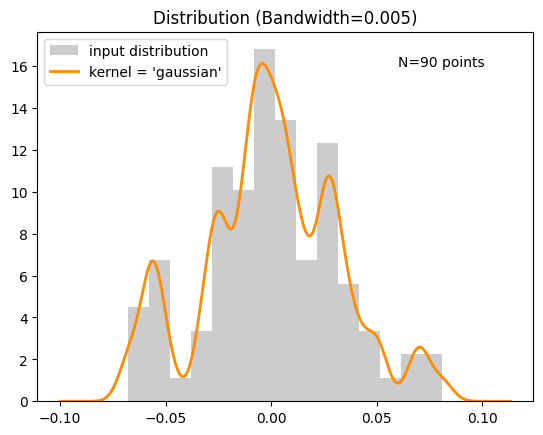

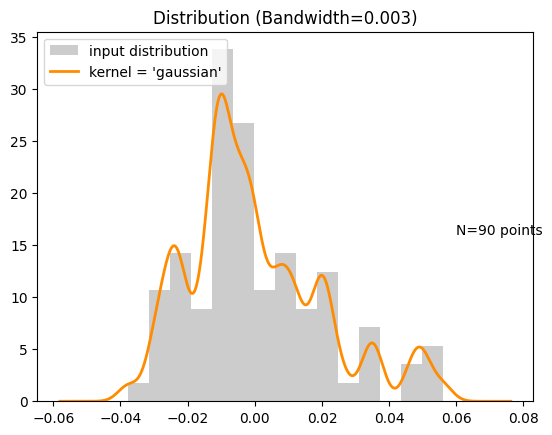

In [18]:
# (g)-a
N = 90
bandwidth_ga = 0.005
#best_bandwidth = find_best_bandwidth(amygdala)
Px = kde1D(amygdala, bandwidth_ga , kernel='gaussian')
plt.title(f'Distribution (Bandwidth={bandwidth_ga})')

bandwidth_gb = 0.003
# (g)-b
Py = kde1D(acc, bandwidth_gb,  kernel='gaussian')
plt.title(f'Distribution (Bandwidth={bandwidth_gb})')

Text(0.5, 1.0, 'Joint Distribution (Bandwidth=0.01)')

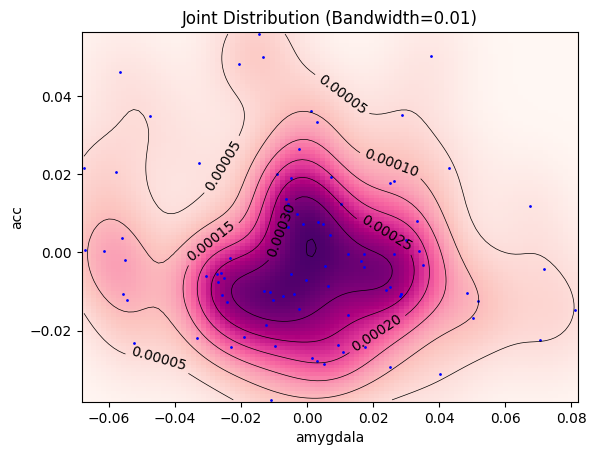

In [19]:
# (g)-c
bandwidth_gc = 0.01  # You can adjust this value

xx, yy, zz, zznorm = kde2D(amygdaladata, accdata, bandwidth_gc, kernel='gaussian', xbins=100j, ybins=100j)
plt.xlabel('amygdala')
plt.ylabel('acc')
plt.title(f'Joint Distribution (Bandwidth={bandwidth_gc})')

In [20]:
# (g)-(d)
from sklearn.metrics import mean_squared_error
N = 90
Px, z = kde1D(amygdala, bandwidth_a,kernel='gaussian', bins=100)
plt.close()
Py, z2 = kde1D(acc, bandwidth_b, kernel='gaussian',bins=100)
plt.close()

z = z.reshape(100,1)
z2 = z2.reshape(1,100)

z /= np.sum(z)
z2 /= np.sum(z2)

#P(x) * P(Y)
PxPy = np.matmul(z,z2)
#P(X,Y)
Pxy = zznorm
print(f'P(X)*P(Y) = {PxPy}')
print(f'P(X,Y) = {Pxy}')

# Independent or dependent
mse = mean_squared_error(PxPy, Pxy)
print(f'MSE = {mse}')

P(X)*P(Y) = [[2.69253026e-09 3.23721721e-09 3.86871586e-09 ... 2.24061477e-09
  1.93078010e-09 1.65271711e-09]
 [6.29250414e-09 7.56544989e-09 9.04127651e-09 ... 5.23636744e-09
  4.51227679e-09 3.86243728e-09]
 [1.39210914e-08 1.67372666e-08 2.00022812e-08 ... 1.15845692e-08
  9.98264225e-09 8.54498325e-09]
 ...
 [6.91288579e-09 8.31133199e-09 9.93266122e-09 ... 5.75262395e-09
  4.95714478e-09 4.24323722e-09]
 [3.15014819e-09 3.78740923e-09 4.52623633e-09 ... 2.62142591e-09
  2.25893225e-09 1.93361014e-09]
 [1.35794052e-09 1.63264588e-09 1.95113352e-09 ... 1.13002318e-09
  9.73762331e-10 8.33525093e-10]]
P(X,Y) = [[3.85363873e-06 4.52253574e-06 5.27485484e-06 ... 1.18908607e-05
  1.09013573e-05 9.91730265e-06]
 [4.75028876e-06 5.56857083e-06 6.48686871e-06 ... 1.39021054e-05
  1.27415619e-05 1.15878334e-05]
 [5.73204195e-06 6.71234401e-06 7.81016250e-06 ... 1.59116633e-05
  1.45769392e-05 1.32511861e-05]
 ...
 [8.31017062e-06 9.74624901e-06 1.13430071e-05 ... 8.68784162e-09
  7.6156196

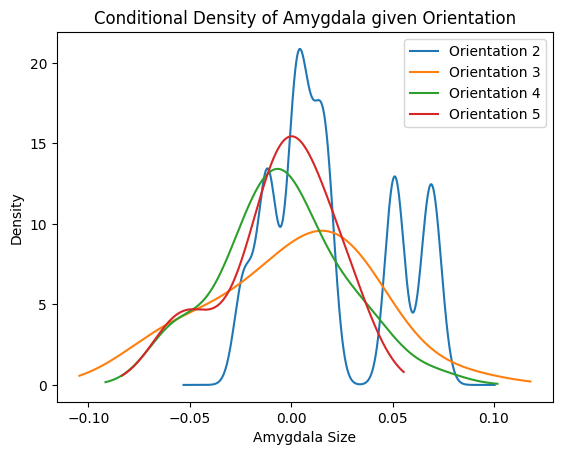

The most likely Orientation for Amygdala = 0.035 is 3
when Orientation is 2, best bandwidth = 0.004699837716753635
when Orientation is 3, best bandwidth = 0.023411574873429722
when Orientation is 4, best bandwidth = 0.013939232330307406
when Orientation is 5, best bandwidth = 0.014236551234545765


In [21]:
# (g)-(e)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('./hw3_data.csv')

orientationdata = data.loc[:, 'orientation']
amygdaladata = data.loc[:, 'amygdala']
amygdala = data['amygdala'].values[:, np.newaxis]
amygdala_ori_2 = data[(data['amygdala']!=0)&(data['orientation']==2)]
amy_ori_2 = amygdala_ori_2.loc[:, 'amygdala']
amy_ori_2_1D = amy_ori_2.values[:, np.newaxis]
amygdala_ori_3 = data[(data['amygdala']!=0)&(data['orientation']==3)]
amy_ori_3 = amygdala_ori_3.loc[:, 'amygdala']
amy_ori_3_1D = amy_ori_3.values[:, np.newaxis]
amygdala_ori_4 = data[(data['amygdala']!=0)&(data['orientation']==4)]
amy_ori_4 = amygdala_ori_4.loc[:, 'amygdala']
amy_ori_4_1D = amy_ori_4.values[:, np.newaxis]
amygdala_ori_5 = data[(data['amygdala']!=0)&(data['orientation']==5)]
amy_ori_5 = amygdala_ori_5.loc[:, 'amygdala']
amy_ori_5_1D = amy_ori_5.values[:, np.newaxis]

ori_context = np.unique(orientationdata)

amy_ori_data = {}
amy_ori_data[2] = amy_ori_2_1D
amy_ori_data[3] = amy_ori_3_1D
amy_ori_data[4] = amy_ori_4_1D
amy_ori_data[5] = amy_ori_5_1D

fig, ax = plt.subplots()
best_bandwidths = {}
log_likelihoods = []
def kde_conditional(data, ori_num, target_amygdala, kernel='gaussian'):

    xx = np.linspace(np.min(data)-np.std(data),np.max(data)+np.std(data), 1000)[:, np.newaxis]
    
    kde = KernelDensity(kernel='gaussian')
    kde.fit(data)

    grid = GridSearchCV(kde, {'bandwidth': np.linspace(0.1*np.std(data), np.std(data)*2, 100)}, cv=4)
    grid.fit(data)
    kde = grid.best_estimator_

    best_bandwidth = grid.best_params_['bandwidth']
    best_bandwidths[ori_num] = best_bandwidth

    log_dens = kde.score_samples(xx.reshape(-1, 1))
    density = np.exp(log_dens)

    label = f'Orientation {ori_num}'
    ax.plot(xx, density, label=label)

    log_likelihood = kde.score_samples(np.array([[target_amygdala]]))
    log_likelihoods.append(np.exp(log_likelihood))

    return kde

target_amygdala = 0.035
kde_amy_ori = {}
for i in ori_context:
    kde_amy_ori[i] = kde_conditional(amy_ori_data[i], i, target_amygdala, kernel='gaussian')

ax.set_xlabel('Amygdala Size')
ax.set_ylabel('Density')
ax.legend()
plt.title('Conditional Density of Amygdala given Orientation')
plt.show()

most_likely_orientation = np.argmax(log_likelihoods) + 2
print(f"The most likely Orientation for Amygdala = {target_amygdala} is {most_likely_orientation}")
print(f"when Orientation is 2, best bandwidth = {best_bandwidths[2]}")
print(f"when Orientation is 3, best bandwidth = {best_bandwidths[3]}")
print(f"when Orientation is 4, best bandwidth = {best_bandwidths[4]}")
print(f"when Orientation is 5, best bandwidth = {best_bandwidths[5]}")

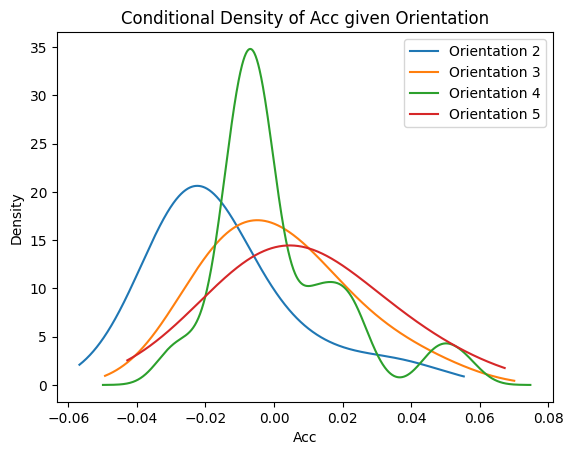

The most likely Orientation for Acc = -0.02 is 2
when Orientation is 2, best bandwidth = 0.014003591368043978
when Orientation is 3, best bandwidth = 0.012699348216778934
when Orientation is 4, best bandwidth = 0.005162909150527759
when Orientation is 5, best bandwidth = 0.020006010169194104


In [22]:
#(g)-(f)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('./hw3_data.csv')

orientationdata = data.loc[:, 'orientation']

accdata = data.loc[:, 'acc']
acc = data['amygdala'].values[:, np.newaxis]
accdata_ori_2 = data[(data['acc']!=0)&(data['orientation']==2)]
acc_ori_2 = accdata_ori_2.loc[:, 'acc']
acc_ori_2_1D = acc_ori_2.values[:, np.newaxis]
accdata_ori_3 = data[(data['acc']!=0)&(data['orientation']==3)]
acc_ori_3 = accdata_ori_3.loc[:, 'acc']
acc_ori_3_1D = acc_ori_3.values[:, np.newaxis]
accdata_ori_4 = data[(data['acc']!=0)&(data['orientation']==4)]
acc_ori_4 = accdata_ori_4.loc[:, 'acc']
acc_ori_4_1D = acc_ori_4.values[:, np.newaxis]
accdata_ori_5 = data[(data['acc']!=0)&(data['orientation']==5)]
acc_ori_5 = accdata_ori_5.loc[:, 'acc']
acc_ori_5_1D = acc_ori_5.values[:, np.newaxis]

ori_context = np.unique(orientationdata)

acc_ori_data = {}
acc_ori_data[2] = acc_ori_2_1D
acc_ori_data[3] = acc_ori_3_1D
acc_ori_data[4] = acc_ori_4_1D
acc_ori_data[5] = acc_ori_5_1D

fig, ax = plt.subplots()
best_bandwidths = {}
log_likelihoods = []
def kde_conditional(data, ori_num, target_acc, kernel='gaussian'):

    xx = np.linspace(np.min(data)-np.std(data),np.max(data)+np.std(data), 1000)[:, np.newaxis]
    
    kde = KernelDensity(kernel='gaussian')
    kde.fit(data)

    grid = GridSearchCV(kde, {'bandwidth': np.linspace(0.1*np.std(data), 2*np.std(data), 100)}, cv=5) 
    grid.fit(data)
    kde = grid.best_estimator_

    best_bandwidth = grid.best_params_['bandwidth']
    best_bandwidths[ori_num] = best_bandwidth
    
    log_dens = kde.score_samples(xx.reshape(-1, 1))
    density = np.exp(log_dens)

    label = f'Orientation {ori_num}'
    ax.plot(xx, density, label=label)

    log_likelihood = kde.score_samples(np.array([[target_acc]]))
    log_likelihoods.append(np.exp(log_likelihood))

    return kde
    
target_acc = -0.02
kde_acc_ori = {}
for i in ori_context:
    kde_acc_ori[i] = kde_conditional(acc_ori_data[i], i, target_acc, kernel='gaussian')

ax.set_xlabel('Acc')
ax.set_ylabel('Density')
ax.legend()
plt.title('Conditional Density of Acc given Orientation')
plt.show()

most_likely_orientation = np.argmax(log_likelihoods) + 2
print(f"The most likely Orientation for Acc = {target_acc} is {most_likely_orientation}")
print(f"when Orientation is 2, best bandwidth = {best_bandwidths[2]}")
print(f"when Orientation is 3, best bandwidth = {best_bandwidths[3]}")
print(f"when Orientation is 4, best bandwidth = {best_bandwidths[4]}")
print(f"when Orientation is 5, best bandwidth = {best_bandwidths[5]}")